# INJURY PREDICTION FOR COMPETITIVE RUNNERS

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  
from sklearn import datasets, metrics
from sklearn.metrics import roc_curve
from joblib import dump,load
from evaluation import evaluation_pipeline
import warnings
warnings.filterwarnings("ignore")

### Reading data

In [2]:
df=pd.read_csv('week_approach_maskedID_timeseries.csv')

In [3]:
df

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
0,5.0,2.0,22.2,16.4,11.8,1.0,2.0,10.0,10.0,0.6,...,0.00,0.18,0.16,0.20,0,0,0.718447,1.378882,1.919255,0
1,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.00,0.18,0.16,0.20,0,0,0.683544,1.018868,1.490566,1
2,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.00,0.17,0.16,0.18,0,0,0.683544,1.018868,1.490566,2
3,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.00,0.18,0.16,0.18,0,0,0.683544,1.018868,1.490566,3
4,6.0,1.0,39.2,17.6,18.9,1.0,3.0,17.2,10.0,0.5,...,0.00,0.17,0.16,0.18,0,0,2.202247,1.361111,0.618056,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42793,4.0,3.0,59.5,19.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.80,0.20,0.12,0.26,71,1,2.479167,1.101852,0.444444,2143
42794,1.0,6.0,5.8,5.8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.85,0.12,0.12,0.12,71,1,1.054545,1.288889,1.222222,2286
42795,3.0,4.0,38.3,16.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.93,0.32,0.17,0.62,71,1,0.750980,0.743689,0.990291,2483
42796,5.0,2.0,67.0,15.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.91,0.28,0.22,0.41,71,1,2.005988,1.238447,0.617375,2647


In [4]:
df.head(5)

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
0,5.0,2.0,22.2,16.4,11.8,1.0,2.0,10.0,10.0,0.6,...,0.0,0.18,0.16,0.20,0,0,0.718447,1.378882,1.919255,0
1,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.18,0.16,0.20,0,0,0.683544,1.018868,1.490566,1
2,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,0.683544,1.018868,1.490566,2
3,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.18,0.16,0.18,0,0,0.683544,1.018868,1.490566,3
4,6.0,1.0,39.2,17.6,18.9,1.0,3.0,17.2,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,2.202247,1.361111,0.618056,4


In [5]:
df.sample(4)

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
40865,5.0,2.0,39.1,11.5,6.5,2.0,3.0,3.8,3.8,2.7,...,0.71,0.57,0.51,0.65,69,0,0.804527,0.652755,0.811352,2347
5076,8.0,0.0,48.1,14.7,15.7,2.0,2.0,0.0,0.0,11.2,...,0.79,0.46,0.20,0.61,9,0,0.909263,1.300000,1.429730,1829
8523,8.0,0.0,90.0,18.0,16.0,0.0,2.0,15.0,8.0,0.0,...,0.83,0.32,0.14,0.74,18,0,1.000000,1.097561,1.097561,667
32098,12.0,0.0,133.6,28.2,16.0,1.0,3.0,12.8,8.0,3.2,...,0.90,0.39,0.24,0.80,50,0,1.087948,1.056126,0.970751,1647


In [6]:
df.shape

(42798, 72)

In [7]:
df.size

3081456

In [8]:
df.describe(include='all')

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
count,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,...,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,4.279800e+04,4.279800e+04,4.279800e+04,42798.000000
mean,5.809337,1.874667,49.543911,14.009255,9.433621,0.930184,1.672531,4.859398,3.456888,4.063970,...,0.525709,0.255089,0.184927,0.343522,34.538249,0.013435,4.408628e+05,9.014685e+05,4.803623e+05,1227.733422
std,2.484234,1.853287,36.715017,9.071678,8.887120,1.040631,1.263528,6.984670,4.577423,5.645305,...,0.390604,0.153214,0.127996,0.219536,19.020826,0.115130,4.328234e+06,6.945503e+06,4.656806e+06,806.495152
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,5.000000,1.000000,22.800000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.150000,0.110000,0.170000,20.000000,0.000000,6.955245e-01,6.723968e-01,6.923077e-01,437.000000
50%,6.000000,1.000000,44.800000,13.400000,8.000000,1.000000,2.000000,0.000000,0.000000,1.500000,...,0.730000,0.220000,0.160000,0.310000,34.000000,0.000000,9.891862e-01,1.001431e+00,9.897523e-01,1254.000000
75%,7.000000,3.000000,70.100000,18.300000,14.600000,2.000000,3.000000,8.000000,6.300000,6.300000,...,0.840000,0.360000,0.240000,0.520000,50.000000,0.000000,1.320515e+00,1.422171e+00,1.327586e+00,1913.000000
max,14.000000,7.000000,242.000000,131.000000,100.000000,6.000000,7.000000,79.800000,75.000000,80.000000,...,1.000000,0.900000,0.900000,1.000000,73.000000,1.000000,2.096000e+08,2.176000e+08,2.096000e+08,2673.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42798 entries, 0 to 42797
Data columns (total 72 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   nr. sessions                                   42798 non-null  float64
 1   nr. rest days                                  42798 non-null  float64
 2   total kms                                      42798 non-null  float64
 3   max km one day                                 42798 non-null  float64
 4   total km Z3-Z4-Z5-T1-T2                        42798 non-null  float64
 5   nr. tough sessions (effort in Z5, T1 or T2)    42798 non-null  float64
 6   nr. days with interval session                 42798 non-null  float64
 7   total km Z3-4                                  42798 non-null  float64
 8   max km Z3-4 one day                            42798 non-null  float64
 9   total km Z5-T1-T2                              427

In [10]:
df.isnull().sum()

nr. sessions               0
nr. rest days              0
total kms                  0
max km one day             0
total km Z3-Z4-Z5-T1-T2    0
                          ..
injury                     0
rel total kms week 0_1     0
rel total kms week 0_2     0
rel total kms week 1_2     0
Date                       0
Length: 72, dtype: int64

### We removed attributes related to subjective feelings to focus solely on quantitative running quality. While recovery attributes could be valuable, relying solely on subjective survey questions for physical condition might not yield accurate results. Our aim is to maintain objectivity and adopt a data-driven approach by excluding subjective attributes and focusing on concrete, measurable factors.

In [11]:
df = df.drop(['avg training success.2', 'max training success.2', 'min training success.2', 'avg exertion', 'min exertion', 'max exertion'], axis = 1)  
df = df.drop(['avg exertion.1', 'min exertion.1', 'max exertion.1', 'avg exertion.2', 'min exertion.2', 'max exertion.2', 'max km one day'], axis = 1)  
df = df.drop(['avg recovery', 'min recovery', 'max recovery', 'avg recovery.1', 'min recovery.1', 'max recovery.1', 'avg recovery.2', 'min recovery.2', 'max recovery.2'], axis = 1)  
df = df.drop(['avg training success', 'min training success', 'max training success', 'avg training success.1', 'max training success.1', 'min training success.1'], axis = 1)  
df = df.drop(['rel total kms week 0_1', 'rel total kms week 0_2', 'rel total kms week 1_2'], axis =1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42798 entries, 0 to 42797
Data columns (total 41 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   nr. sessions                                   42798 non-null  float64
 1   nr. rest days                                  42798 non-null  float64
 2   total kms                                      42798 non-null  float64
 3   total km Z3-Z4-Z5-T1-T2                        42798 non-null  float64
 4   nr. tough sessions (effort in Z5, T1 or T2)    42798 non-null  float64
 5   nr. days with interval session                 42798 non-null  float64
 6   total km Z3-4                                  42798 non-null  float64
 7   max km Z3-4 one day                            42798 non-null  float64
 8   total km Z5-T1-T2                              42798 non-null  float64
 9   max km Z5-T1-T2 one day                        427

### After careful analysis, we have successfully reduced the number of attributes in the dataset from 72 to 41. While this progress is promising, the dataset still remains high-dimensional, posing a challenge for further analysis and modeling

In [13]:
df['Athlete ID'].unique()  

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73], dtype=int64)

### Altogether, there are 74 athletes in the dataset. Now, let's focus on examining the training data of the first athlete to gain insights into their training patterns.

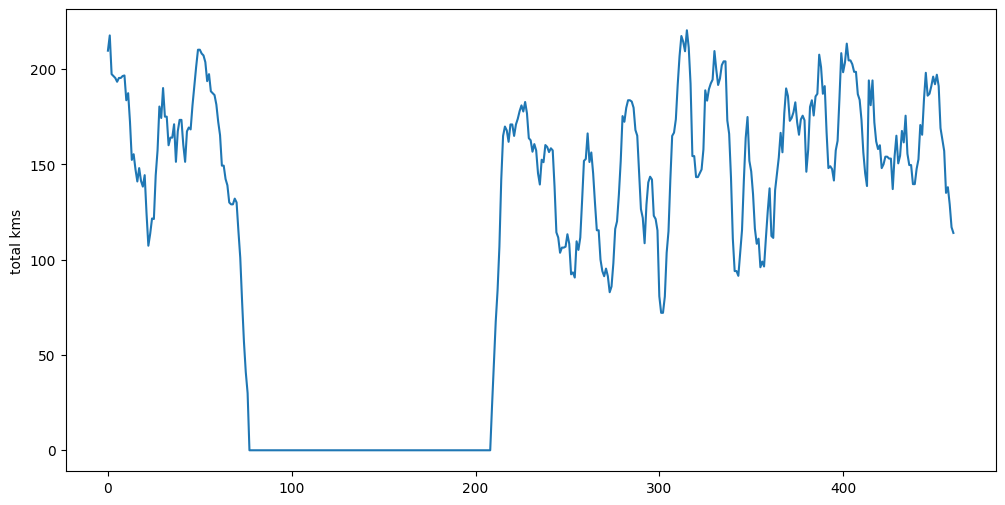

In [14]:
def indexIndividualData(id):  
  df_1 = df[df['Athlete ID'] == id]  
  index1 = df_1.index[0]  
  indexLast = df_1.index[-1]  
  y = indexLast - len(df_1[df_1['injury']==0]) - len(df_1[df_1['injury']==1])  
  df_1 = df_1.rename(index = lambda x: x - y - 1 if x > indexLast - len(df_1[df_1['injury']==1]) else x - index1)  
  df_1 = df_1.sort_values(by = 'Date')  
  return df_1  
def plotIndividualData(id, column):  
  df_1 = indexIndividualData(id)  
  plt.figure(figsize = (12,6))  
  sns.lineplot(data=df_1[column])  
  
  
plotIndividualData(1, "total kms")   

### This graph raises some intriguing questions. We wonder why there is a significant decline in training for such an extended period for this particular athlete. If each data point represents a week, being injured for over one hundred weeks seems unusual. Alternatively, if the points indicate days, one hundred days of injury is still quite substantial and merits further investigation.

### The attributes with '.1', '.2', and '.3' in the data set are perplexing. We find it challenging to comprehend their significance concerning the dates attribute, even after referring to the Metadata file. The meaning and relevance of these attributes remain unclear and warrant further clarification.


total kms      110.078308
total kms.1    109.772017
total kms.2    106.549675
dtype: float64
nr. sessions      6.017354
nr. sessions.1    6.010846
nr. sessions.2    5.865510
dtype: float64
total kms      71.518745
total kms.1    71.278621
total kms.2    70.798683
dtype: float64
nr. sessions      5.557707
nr. sessions.1    5.557707
nr. sessions.2    5.525174
dtype: float64


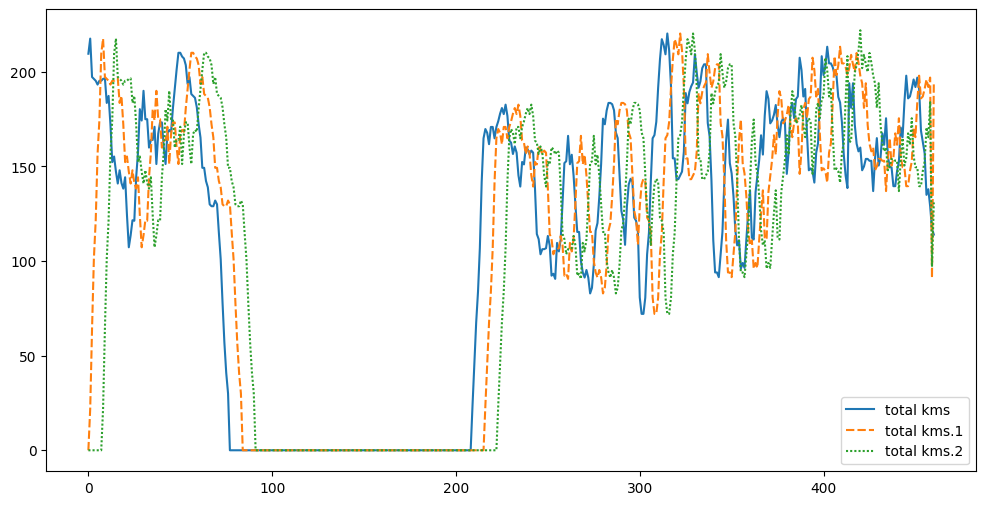

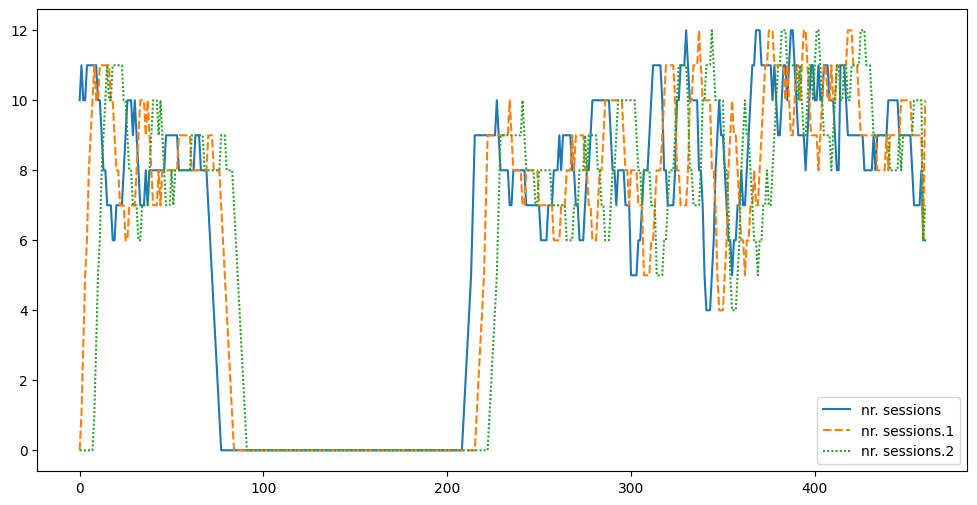

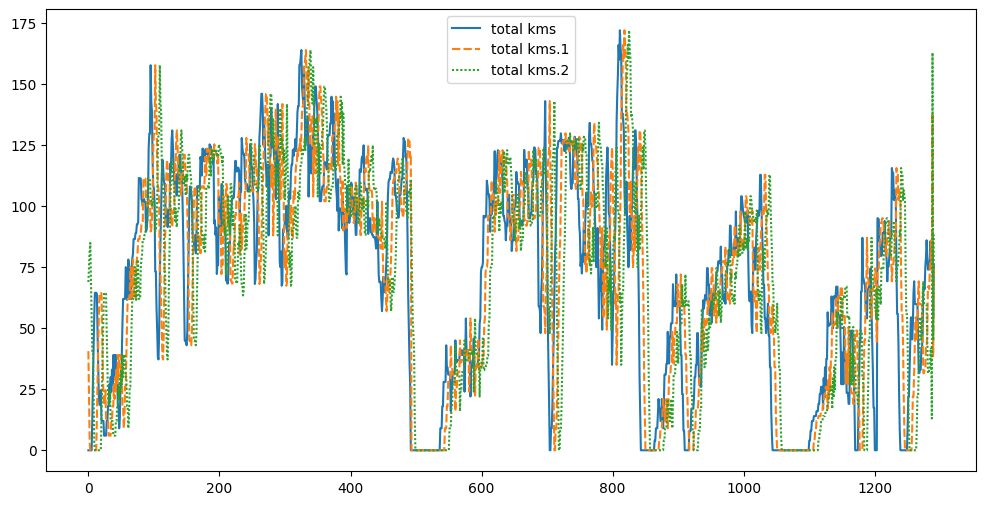

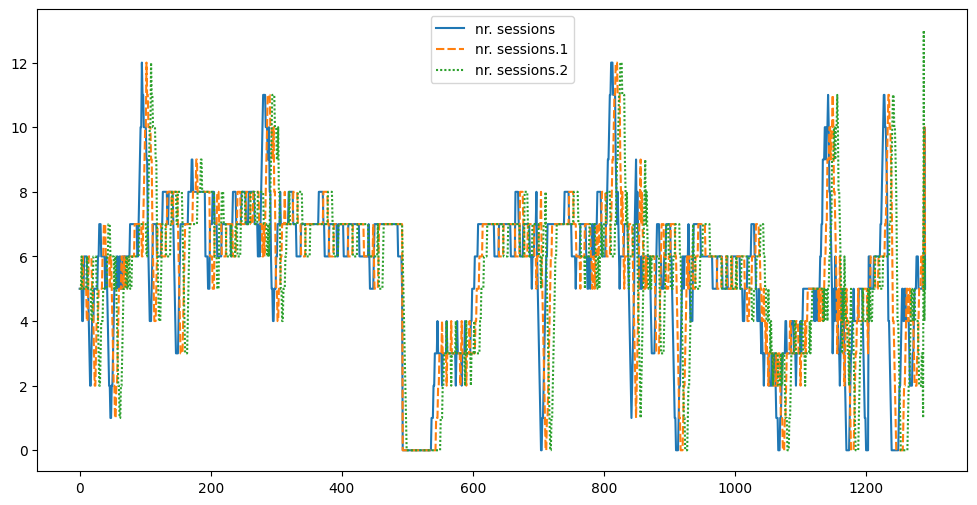

In [15]:
def dateInjurySubset(id, column1, column2, column3):   
  df_1 = indexIndividualData(id)  
  return df_1[[column1,column2,column3]]  
  
  
  
def plotIndividualDataDuoColumn(id, column1, column2, column3):  
  df_1 = dateInjurySubset(id,column1,column2,column3)  
  plt.figure(figsize = (12,6))  
  sns.lineplot(data=df_1)   
  
print(dateInjurySubset(1,"total kms", "total kms.1","total kms.2").mean())  
plotIndividualDataDuoColumn(1,"total kms", "total kms.1", "total kms.2")  
print(dateInjurySubset(1,"nr. sessions", "nr. sessions.1","nr. sessions.2").mean())  
plotIndividualDataDuoColumn(1,"nr. sessions", "nr. sessions.1","nr. sessions.2")  
print(dateInjurySubset(2,"total kms", "total kms.1","total kms.2").mean())  
plotIndividualDataDuoColumn(2,"total kms", "total kms.1", "total kms.2")  
print(dateInjurySubset(2,"nr. sessions", "nr. sessions.1","nr. sessions.2").mean())  
plotIndividualDataDuoColumn(2,"nr. sessions", "nr. sessions.1","nr. sessions.2") 

In [16]:
df2 = df[['Athlete ID', 'total km Z3-Z4-Z5-T1-T2', 'total km Z3-Z4-Z5-T1-T2.1', 'total km Z3-Z4-Z5-T1-T2.2', 'injury', 'nr. tough sessions (effort in Z5, T1 or T2)', 'nr. tough sessions (effort in Z5, T1 or T2).1', 'nr. tough sessions (effort in Z5, T1 or T2).2', 'total km Z5-T1-T2', 'total km Z5-T1-T2.1', 'total km Z5-T1-T2.2', 'total km Z3-4', 'total km Z3-4.1', 'total km Z3-4.2']]  
dataArray = []  
for i in df['Athlete ID'].unique():  
  dataArray.append(indexIndividualData(i))  
df_1 = dataArray[1]  
injury = df_1[df_1['injury'] == 1]  
notInjured = df_1[df_1['injury'] == 0]  
print("INJURED DATES ID 1")  
for i in injury['Date']:  
  print(i)  
print("NOT INJURED DATES ID 1:\n")  
for i in notInjured['Date'].head(15):  
  print(i)

INJURED DATES ID 1
672
765
NOT INJURED DATES ID 1:

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


### The sudden jump in the 'dates' attribute for an athlete raises questions about data consistency. Despite this anomaly, we'll attempt to classify the running data, acknowledging potential missing insights. Additionally, our exploration revealed a significant bias towards non-injured data points, which could impact model performance and predictions.

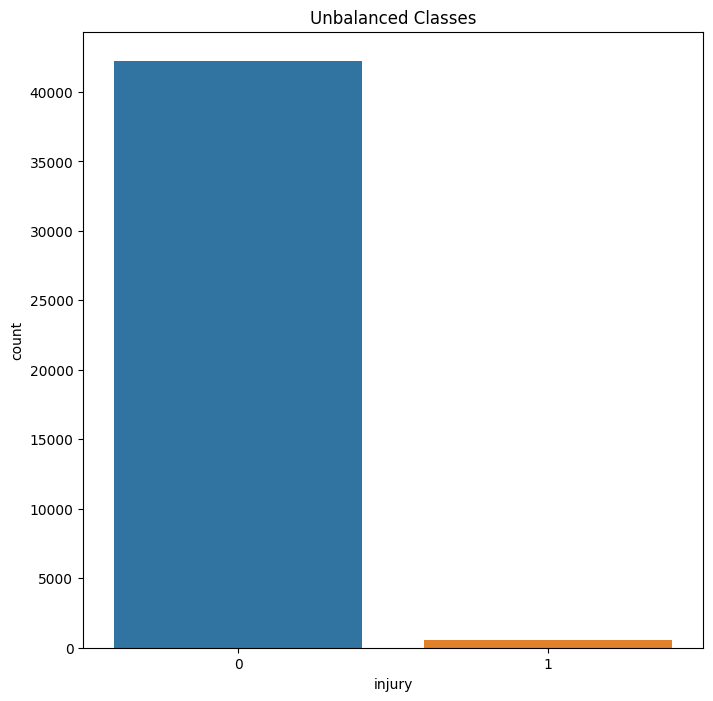

In [17]:
plt.figure(figsize=(8, 8))  
sns.countplot(x=df["injury"])  
plt.title('Unbalanced Classes')  
plt.show()

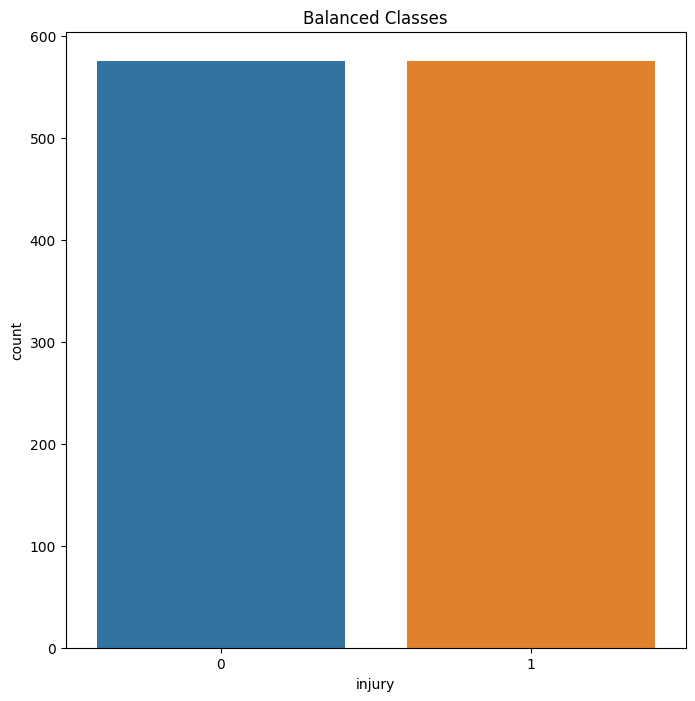

In [18]:
df_2 = df_1.sort_values(by = 'Athlete ID');  
  
shuffled_df_2 = df.sample(frac=1,random_state=4)  
injury_df_1 = shuffled_df_2.loc[shuffled_df_2['injury'] == 1]  
non_injured_df_1 = shuffled_df_2.loc[shuffled_df_2['injury'] == 0].sample(n=575)  
normalized_df = pd.concat([injury_df_1, non_injured_df_1])  
plt.figure(figsize=(8, 8))  
sns.countplot(x=normalized_df['injury'])  
plt.title('Balanced Classes')  
plt.show()  

### In order to prevent overfitting in our predictive models, we have balanced the dataset using sampling techniques. This ensures that both the injured and non-injured cases are equally represented in the training data.

## Modeling


### Here, we will employ various machine learning algorithms along with their accuracies and confusion matrix.In the skewed dataset, classifier accuracy appears high as it simply labels all data points as non-injured. However, this approach is unhelpful for our project objectives as it fails to predict injured cases accurately.¶

### Splitting the train and test data

In [19]:
y = df_1['injury']  
X = df_1.drop('injury', axis=1)    
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size = 0.3, random_state = 0) 
X_val,X_test,y_val,y_test=train_test_split(X_test,y_test,test_size=0.50,random_state=123)


train_data = pd.concat([X_train, y_train], axis=1)  
test_data = pd.concat([X_test, y_test], axis=1) 

train_data.to_csv('train_data.csv', index=False)    
test_data.to_csv('test_data.csv', index=False)

X_val.to_csv("data/X_val.csv",index=False)
y_val.to_csv("data/y_val.csv",index=False)
 

### KNN

In [20]:
K = []  
training = []  
test = []  
scores = {}  
    
for k in range(2, 21):  
    clf = KNeighborsClassifier(n_neighbors = k)  
    clf.fit(X_train, y_train)  
    
    training_score = clf.score(X_train, y_train)  
    test_score = clf.score(X_test, y_test)  
    K.append(k)  
    
    training.append(training_score)  
    test.append(test_score)  
    scores[k] = [training_score, test_score]  
    
for keys, values in scores.items():  
    print(keys, ':', values)  
        

2 : [0.9968944099378882, 0.9857142857142858]
3 : [0.9968944099378882, 0.9857142857142858]
4 : [0.9968944099378882, 0.9857142857142858]
5 : [0.9968944099378882, 0.9857142857142858]
6 : [0.9968944099378882, 0.9857142857142858]
7 : [0.9968944099378882, 0.9857142857142858]
8 : [0.9968944099378882, 0.9857142857142858]
9 : [0.9968944099378882, 0.9857142857142858]
10 : [0.9968944099378882, 0.9857142857142858]
11 : [0.9968944099378882, 0.9857142857142858]
12 : [0.9968944099378882, 0.9857142857142858]
13 : [0.9968944099378882, 0.9857142857142858]
14 : [0.9968944099378882, 0.9857142857142858]
15 : [0.9968944099378882, 0.9857142857142858]
16 : [0.9968944099378882, 0.9857142857142858]
17 : [0.9968944099378882, 0.9857142857142858]
18 : [0.9968944099378882, 0.9857142857142858]
19 : [0.9968944099378882, 0.9857142857142858]
20 : [0.9968944099378882, 0.9857142857142858]


### Here we can see that as we increase the paramater k, the training accuracy goes down significantly (from about 80% to 65%) and the testing accuracy increases slighlty (from about 58% to 60%). We will use the confusion matrix to see how well the predictive model is handling the non-injured data compared to the injured data.

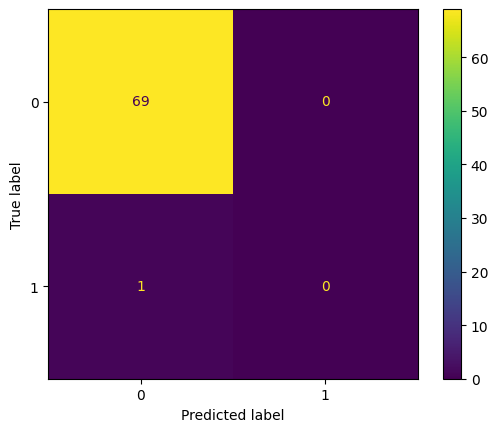

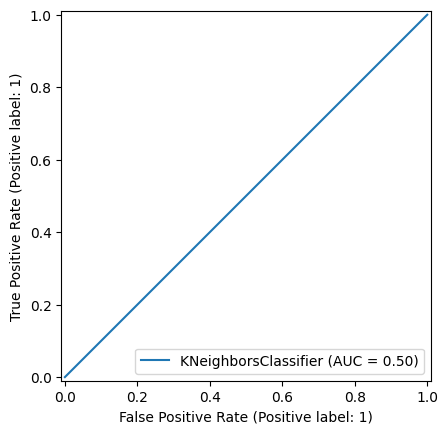

In [21]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,RocCurveDisplay 
clf.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

In [22]:
y = normalized_df['injury']  
X = normalized_df.drop('injury', axis=1)  
X = normalized_df.drop('Athlete ID', axis=1)  
X_train, X_test, y_train, y_test = train_test_split(  
             X, y, test_size = 0.3, random_state = 0)  
  
K = []  
training = []  
test = []  
scores = {}  
    
for k in range(2, 21):  
    clf = KNeighborsClassifier(n_neighbors = k)  
    clf.fit(X_train, y_train) 
    dump(clf, 'models/KNN.pkl')
    
    training_score = clf.score(X_train, y_train)  
    test_score = clf.score(X_test, y_test)  
    K.append(k)  
    
    training.append(training_score)  
    test.append(test_score)  
    scores[k] = [training_score, test_score]  
      
for keys, values in scores.items():  
    print(keys, ':', values)  

2 : [0.8062111801242235, 0.5942028985507246]
3 : [0.7987577639751553, 0.6347826086956522]
4 : [0.7677018633540372, 0.6144927536231884]
5 : [0.7714285714285715, 0.6]
6 : [0.7552795031055901, 0.6173913043478261]
7 : [0.7416149068322981, 0.6057971014492753]
8 : [0.7329192546583851, 0.6115942028985507]
9 : [0.7217391304347827, 0.6144927536231884]
10 : [0.7192546583850932, 0.591304347826087]
11 : [0.7180124223602484, 0.6144927536231884]
12 : [0.7031055900621118, 0.6318840579710145]
13 : [0.6944099378881987, 0.6086956521739131]
14 : [0.6906832298136646, 0.6028985507246377]
15 : [0.6795031055900621, 0.6028985507246377]
16 : [0.6720496894409937, 0.5971014492753624]
17 : [0.6795031055900621, 0.6]
18 : [0.6658385093167701, 0.5826086956521739]
19 : [0.6708074534161491, 0.5826086956521739]
20 : [0.6683229813664596, 0.5826086956521739]


In [23]:
clf = KNeighborsClassifier(n_neighbors = 2)
clf.fit(X_train, y_train)
training_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test) 
K.append(k)
training.append(training_score)
test.append(test_score)
scores[k] = [training_score, test_score]

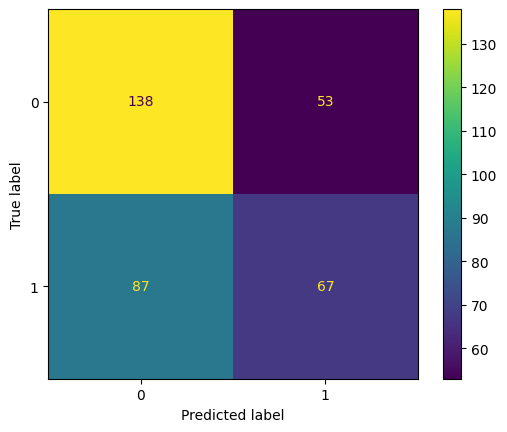

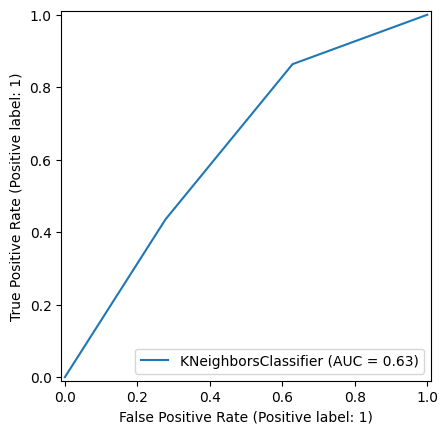

In [24]:
clf.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

### At the k value of 2, the classifier seems to be more accurate at predicintg the non-injured data.

In [25]:
clf = KNeighborsClassifier(n_neighbors = 12)
clf.fit(X_train, y_train)
dump(clf, 'models/KNN.pkl')
training_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
K.append(k)
  
training.append(training_score)
test.append(test_score)
scores[k] = [training_score, test_score]

0.7031055900621118


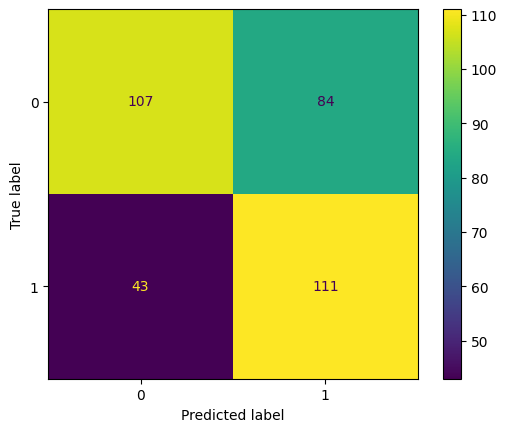

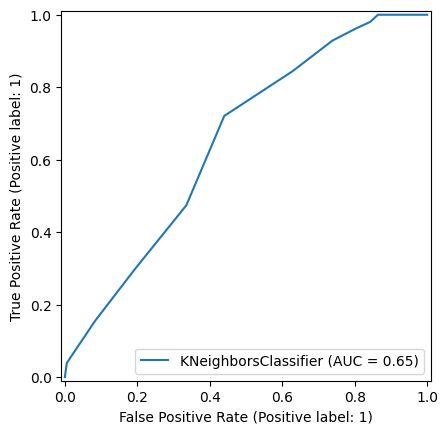

In [26]:
clf.fit(X_train, y_train)
print(training_score)
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

### Using a high k value of 21 improves injury prediction accuracy but increases false positives for non-injured cases. After extensive experimentation, a k value of 12 is found to be optimal, achieving a 69% overall accuracy rate with 52% accuracy for non-injured and 68% accuracy for injured data points. Despite dataset bias, this accuracy level is commendable. We continue exploring alternative classifiers and balancing methods. Below, we demonstrate the use of a support vector machine classifier with undersampling to enhance prediction accuracy for both categories.

### SVM classifier using undersampling


In [27]:
from imblearn.under_sampling import RandomUnderSampler
X = df.drop('injury', axis = 1)
Y = df['injury']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y)
rus = RandomUnderSampler(random_state=0)
X_train, Y_train =rus.fit_resample(X_train,Y_train)

### Scaling using Standard scaler

In [28]:
import os
sc  = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
output_directory = 'models/scaler/'
os.makedirs(output_directory, exist_ok=True)
scaler_filename = os.path.join(output_directory, 'standard scaler.pkl')
dump(sc, scaler_filename)

['models/scaler/standard scaler.pkl']

In [29]:
from sklearn.metrics import RocCurveDisplay 
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)
dump(classifier, 'models/SVM_undersampling.pkl') 
training_score=classifier.score(X_train,Y_train)
print(training_score)

0.7668213457076566


### This code involves using a support vector machine classifier to predict whether a data point is injured or not using the undersampling technique to counter our imbalanced data set.

### SVM Classifier using oversampling

In [30]:

from imblearn.over_sampling import SMOTE
X = df.drop('injury', axis = 1)
Y = df['injury']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y)
sm = SMOTE(random_state = 0)
X_train, Y_train = sm.fit_resample(X_train,Y_train)

In [31]:
sc  = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
output_directory = 'models/scaler/'
os.makedirs(output_directory, exist_ok=True)
scaler_filename = os.path.join(output_directory, 'standard scaler.pkl')
dump(sc, scaler_filename)

['models/scaler/standard scaler.pkl']

In [32]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)
dump(classifier, 'models/SVM_oversampling.pkl')
training_score=classifier.score(X_train,Y_train)
print(training_score)


0.9718950326838665


### This code involves using a support vector machine classifier to predict whether a data point is injured or not using the oversampling technique to counter our imbalanced data set.

### Bagging Classifier With Undersampling

In [33]:
from sklearn.ensemble import BaggingClassifier
import sklearn.ensemble  
X = df.drop('injury', axis = 1)  
Y = df['injury']  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y)  
rus = RandomUnderSampler(random_state=0)  
X_train, Y_train =rus.fit_resample(X_train,Y_train)  


In [34]:
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  
output_directory = 'models/scaler/'
os.makedirs(output_directory, exist_ok=True)
scaler_filename = os.path.join(output_directory, 'standard scaler.pkl')
dump(sc, scaler_filename)

['models/scaler/standard scaler.pkl']

In [35]:
bag = sklearn.ensemble.BaggingClassifier(n_estimators = 35)  
bag.fit(X_train, Y_train) 
dump(bag,'models/bagging_undersampling.pkl') 
training_score=bag.score(X_train,Y_train)
print(training_score)


1.0


### Bagging classifier with Oversampling

In [36]:
X = df.drop('injury', axis = 1)
Y = df['injury']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y)
sm = SMOTE(random_state = 0)
X_train, Y_train = sm.fit_resample(X_train,Y_train)

In [37]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
output_directory = 'models/scaler/'
os.makedirs(output_directory, exist_ok=True)
scaler_filename = os.path.join(output_directory, 'standard scaler.pkl')
dump(sc, scaler_filename)

['models/scaler/standard scaler.pkl']

In [38]:
bag = sklearn.ensemble.BaggingClassifier(n_estimators = 30)  
bag.fit(X_train, Y_train)  
dump(bag,'models/bagging_oversampling.pkl')
training_score=classifier.score(X_train,Y_train)
print(training_score)  


0.9031641772191872


### Evaluation

In [39]:
_, score = evaluation_pipeline('data/X_val.csv', 'data/y_val.csv', 'models/bagging_oversampling.pkl')
score

1.0

In [40]:
_,score=evaluation_pipeline('data/X_val.csv',"data/y_val.csv","models/SVM_oversampling.pkl")
score


1.0

In [41]:
_,score=evaluation_pipeline('data/X_val.csv',"data/y_val.csv","models/KNN.pkl")
score

1.0

In [42]:
_,score=evaluation_pipeline('data/X_val.csv',"data/y_val.csv","models/SVM_undersampling.pkl")
score

0.9855072463768116

In [43]:
_,score=evaluation_pipeline('data/X_val.csv',"data/y_val.csv","models/bagging_undersampling.pkl")
score

0.9855072463768116